In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Subset, DataLoader
import numpy as np
from RESNET50 import Bottleneck, ResNet, ResNet50

import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# Change the current working directory
new_directory = r"C:\TCC"  # Replace with your desired path
os.chdir(new_directory)

# Get the new working directory
new_current_directory = os.getcwd()
print(f"New directory: {new_current_directory}")


from transform_data import trans_data

Current directory: C:\TCC
New directory: C:\TCC


In [8]:
EPOC=20
LR=0.001

In [9]:
train_data_path = r"C:\Users\joaog\Deep_Learning\Dataset\chest_xray\train"
test_data_path = r"C:\Users\joaog\Deep_Learning\Dataset\chest_xray\test"
trainloader,testloader = trans_data(train_data_path,test_data_path,5216,36)


In [10]:
#classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
net = ResNet50(10).to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9, weight_decay=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, patience=5)

In [12]:
from tqdm.auto import tqdm

EPOCHS = EPOC
for epoch in range(EPOCHS):
    losses = []
    running_loss = 0
    for i, inp in enumerate(trainloader):
        inputs, labels = inp
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i%9 == 0 and i > 0:
            print(f'Loss [{epoch+1}, {i}](epoch, minibatch): ', round(running_loss / 100,5))
            running_loss = 0.0

    avg_loss = sum(losses)/len(losses)
    scheduler.step(avg_loss)
            


Loss [1, 9](epoch, minibatch):  0.08969
Loss [1, 18](epoch, minibatch):  0.04844
Loss [1, 27](epoch, minibatch):  0.04595
Loss [1, 36](epoch, minibatch):  0.03561
Loss [1, 45](epoch, minibatch):  0.04527
Loss [1, 54](epoch, minibatch):  0.02785
Loss [1, 63](epoch, minibatch):  0.02664
Loss [1, 72](epoch, minibatch):  0.01896
Loss [1, 81](epoch, minibatch):  0.02249
Loss [1, 90](epoch, minibatch):  0.02076
Loss [1, 99](epoch, minibatch):  0.01997
Loss [1, 108](epoch, minibatch):  0.01683
Loss [1, 117](epoch, minibatch):  0.02064
Loss [1, 126](epoch, minibatch):  0.01816
Loss [1, 135](epoch, minibatch):  0.0191
Loss [1, 144](epoch, minibatch):  0.01709
Loss [2, 9](epoch, minibatch):  0.01506
Loss [2, 18](epoch, minibatch):  0.01299
Loss [2, 27](epoch, minibatch):  0.01437
Loss [2, 36](epoch, minibatch):  0.02284
Loss [2, 45](epoch, minibatch):  0.03483
Loss [2, 54](epoch, minibatch):  0.02371
Loss [2, 63](epoch, minibatch):  0.02037
Loss [2, 72](epoch, minibatch):  0.01664
Loss [2, 81](e

KeyboardInterrupt: 

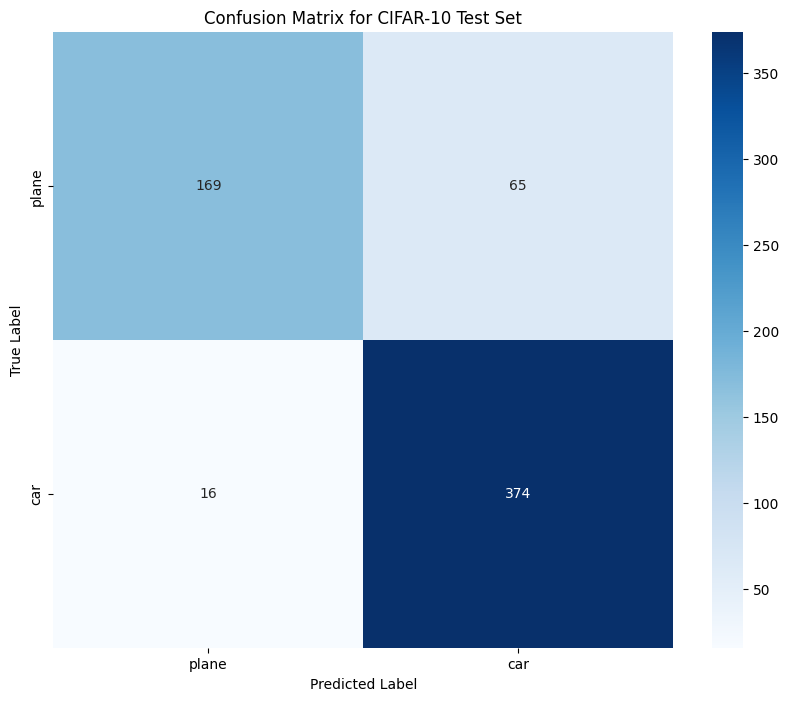

In [13]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- Ensure your network is in evaluation mode ---
net.eval()

# --- Lists to store true labels and predictions ---
all_labels = []
all_predictions = []

# --- No gradient calculation needed for inference ---
with torch.no_grad():
    # Iterate over the test data
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        # Get model outputs
        outputs = net(inputs)
        
        # Get the predicted class (the one with the highest score)
        _, predicted = torch.max(outputs.data, 1)
        
        # Append batch predictions and labels to the lists
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Get the class names from the dataset ---
class_names = ['plane', 'car']

# --- Compute the confusion matrix ---
cm = confusion_matrix(all_labels, all_predictions)

# --- Plot the confusion matrix using seaborn ---
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 Test Set')
plt.show()


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy on 10,000 test images: ', 100*(correct/total), '%')

Accuracy on 10,000 test images:  87.01923076923077 %


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of test data
dataiter = iter(testloader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    # Important: unnormalize if you normalized your data!
    # This assumes you normalized with mean=0.5, std=0.5
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# --- RUN THIS BLOCK ---
# Show the first 4 images from the batch
imshow(torchvision.utils.make_grid(images[:4]))
# Print the labels for those 4 images
print("Labels for the images above: ", ' '.join(f'{labels[j].item()}' for j in range(4)))
# --- --- --- --- --- --
